In [101]:
import pandas as pd
from sklearn.datasets import load_wine

##### Load Dataset

In [102]:
wine = load_wine()

In [103]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [104]:
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [105]:
print(df.shape)
print(df.isnull().sum())

(178, 14)
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [106]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [107]:
print(df['target'].unique())
print(df[df.target == 0].shape)
print(df[df.target == 1].shape)
print(df[df.target == 2].shape)


[0 1 2]
(59, 14)
(71, 14)
(48, 14)


##### Feature Selection ( X , y)

In [108]:
wine_c1 = df[df.target == 0]
wine_c2 = df[df.target == 1]
wine_c3 = df[df.target == 2]

In [109]:
X = df.drop(['target'], axis=1)
y = df['target']


##### Train - Test - Split

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
print(len(X_train))
print(len(X_test))

124
54


##### Training Model

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


##### Check Score

In [113]:
knn.score(X_test,y_test)

0.7407407407407407

##### Finally, select two relevant features (e.g., 'alcohol' and 'malic_acid')  and create a scatter plot to visually inspect how well the three wine classes are separated by those  features.

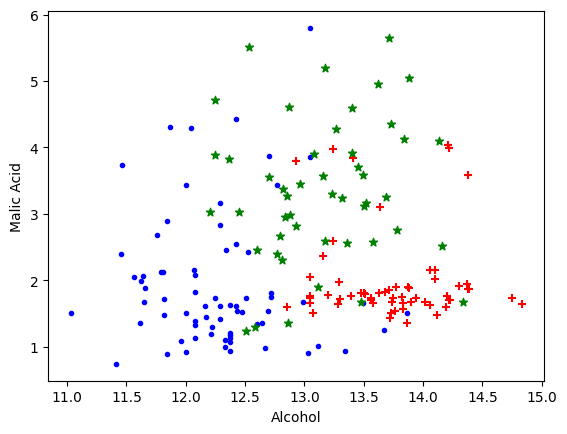

In [114]:
import matplotlib.pyplot as plt
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.scatter(wine_c1['alcohol'],wine_c1['malic_acid'],color='red',marker='+')
plt.scatter(wine_c2['alcohol'],wine_c2['malic_acid'],color='blue',marker='.')
plt.scatter(wine_c3['alcohol'],wine_c3['malic_acid'],color='green',marker='*')

plt.show()